In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [47]:
df = pd.read_csv("./salaries_clean.csv")

df.head()

,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02


In [48]:
# Data extracting
df = df[['location_state', 'job_title', 'total_experience_years', 'employer_experience_years', 'annual_base_pay']]

In [49]:
df.head(10)

,location_state,job_title,total_experience_years,employer_experience_years,annual_base_pay
0,CA,systems engineer,13.0,2.0,125000.0
1,AR,senior developer,15.0,8.0,65000.0
2,OH,software engineer,4.0,1.0,86000.0
3,NaN,mts,4.0,0.0,105000.0
4,NaN,software engineer,4.0,3.0,110000.0
5,OR,it technician,5.0,1.5,40000.0
6,WI,lead interviewer,4.0,2.5,45000.0
7,NY,senior software engineer,8.0,2.0,135000.0
8,NaN,software engineer,2.0,1.0,105000.0
9,NaN,infrastructure/platform engineer,1.0,1.0,80000.0


In [50]:
# Removing infinities and na form data
df = df.replace([np.inf, -np.inf], np.nan).dropna()

df.head(10)

,location_state,job_title,total_experience_years,employer_experience_years,annual_base_pay
0,CA,systems engineer,13.0,2.0,125000.0
1,AR,senior developer,15.0,8.0,65000.0
2,OH,software engineer,4.0,1.0,86000.0
5,OR,it technician,5.0,1.5,40000.0
6,WI,lead interviewer,4.0,2.5,45000.0
7,NY,senior software engineer,8.0,2.0,135000.0
10,CO,senior software engineer,10.0,1.5,120000.0
12,IN,web developer,2.0,1.5,60000.0
17,SC,member of technical staff,19.0,1.0,131000.0
18,PA,student intern co-op,0.0,0.0,24.0


In [51]:
# Defining categorical data (for qualitative variables)
df['location_state'] = df['location_state'].astype('category').cat.codes
df['job_title'] = df['job_title'].astype('category').cat.codes
df.head(10)

,location_state,job_title,total_experience_years,employer_experience_years,annual_base_pay
0,5,255,13.0,2.0,125000.0
1,2,178,15.0,8.0,65000.0
2,31,212,4.0,1.0,86000.0
5,34,92,5.0,1.5,40000.0
6,43,100,4.0,2.5,45000.0
7,30,190,8.0,2.0,135000.0
10,6,190,10.0,1.5,120000.0
12,13,277,2.0,1.5,60000.0
17,36,112,19.0,1.0,131000.0
18,35,242,0.0,0.0,24.0


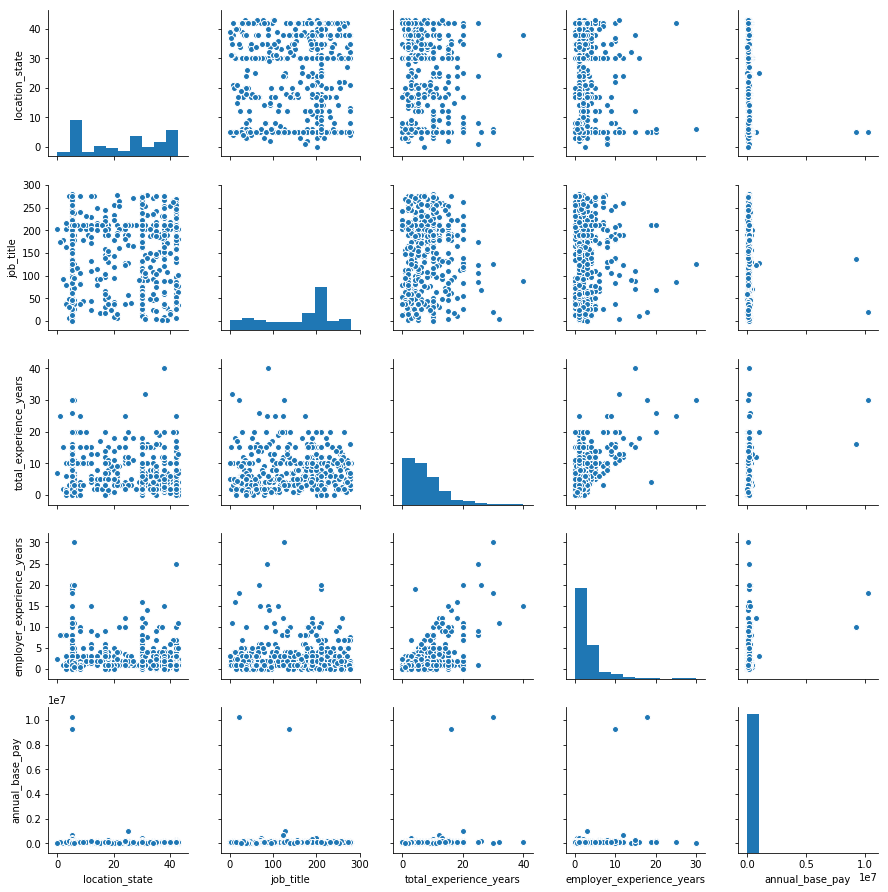

In [52]:
sns.pairplot(df)

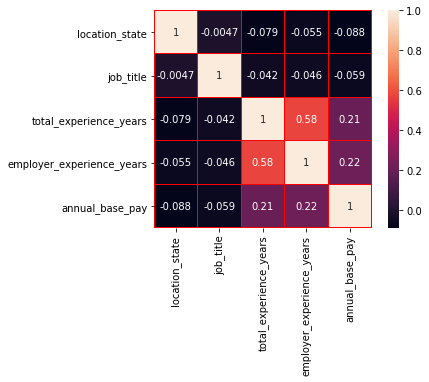

In [53]:
sns.heatmap(df.corr(), linewidths=0.2, vmax=1.0, square=True, linecolor="red", annot=True)

In [54]:
class OutlierRemover:
    def __init__(self, df):
        # Apply replace() on each column of the dataframe
        df = df.apply(self.replace, axis=1)

        # remove the rows containing any outlier:
        df = df[~df.apply(self.is_outlier).any(axis=1)]

        self.df = df

    def is_outlier(self, x):
        # a number "a" from the vector "x" is an outlier if
        # a > median(x)+1.5*iqr(x) or a < median-1.5*iqr(x)
        # iqr: interquantile range = third interquantile - first interquantile
        # The function return a boolean vector: True if the element is an outlier. False, otherwise.
        return np.abs(x - x.median()) > 1.5 * (x.quantile(.95) - x.quantile(0.05))

    def replace(self, x):
        # Replace the upper outlier(s) with the 95th percentile and the lower one(s) with the 5th percentile
        out = x[self.is_outlier(x)]
        return x.replace(to_replace=[out.min(), out.max()], value=[np.percentile(x, 5), np.percentile(x, 95)])

    def get(self):
        return self.df

In [55]:
# Removing outliers
df = OutlierRemover(df).get()
df.head(10)

,location_state,job_title,total_experience_years,employer_experience_years,annual_base_pay
0,5.0,255.0,13.0,2.0,125000.0
1,2.0,178.0,15.0,8.0,65000.0
2,31.0,212.0,4.0,1.0,86000.0
5,34.0,92.0,5.0,1.5,40000.0
6,43.0,100.0,4.0,2.5,45000.0
7,30.0,190.0,8.0,2.0,135000.0
10,6.0,190.0,10.0,1.5,120000.0
12,13.0,277.0,2.0,1.5,60000.0
17,36.0,112.0,19.0,1.0,131000.0
18,35.0,242.0,0.0,0.0,24.0


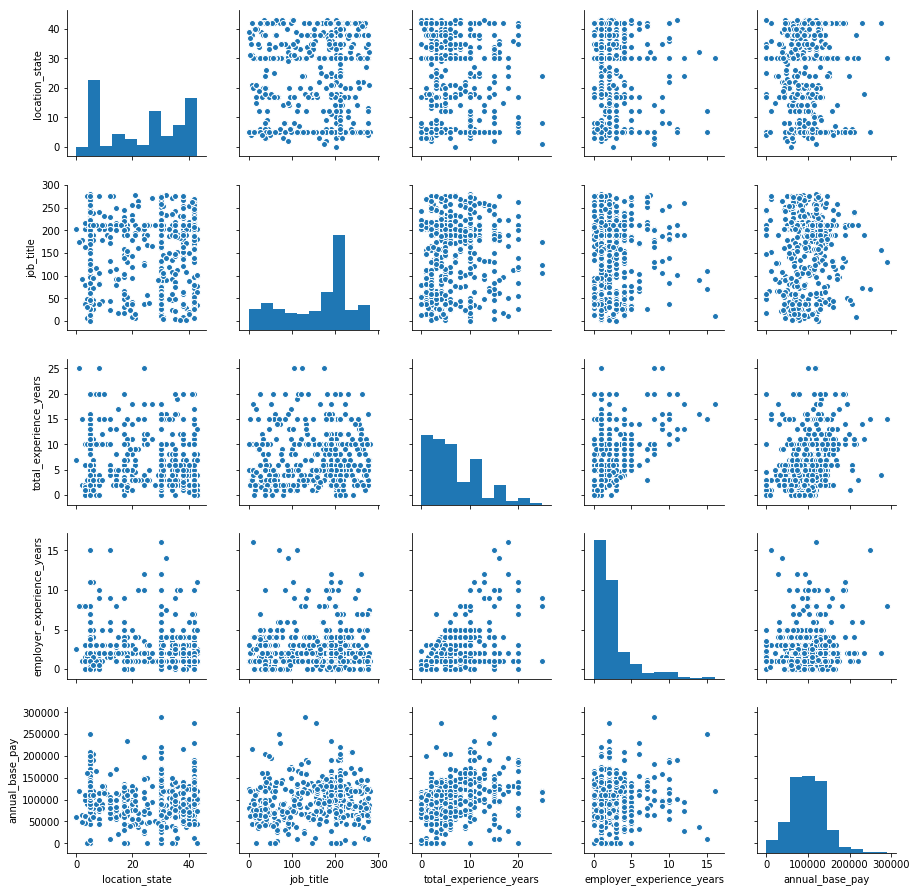

In [56]:
sns.pairplot(df)

In [57]:
features = df.iloc[:,0:-1].values
labels = df.iloc[:,-1].values

In [58]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((413, 4), (413,), (104, 4), (104,))

In [59]:
# Creating linear model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
regressor.coef_, regressor.intercept_

(array([-161.67993898,   57.99855616, 2874.80316803, -345.52973858]),
 76895.30724413635)

In [61]:
print("Train score: ", regressor.score(x_train, y_train))
print("Test score: ", regressor.score(x_test, y_test))

Train score:  0.12426049137181572
Test score:  0.1267434777467349


In [62]:
from sklearn import metrics

y_pred = regressor.predict(x_test)
print("MSE: ", metrics.mean_squared_error(y_pred, y_test))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

MSE:  1542929427.7807164
RMSE:  39280.14037373997


In [63]:
# Predicting
x = [[5, 255, 13.0, 2.0]] # location, job title, experiences, employee experience
y = regressor.predict(x)
y

array([127557.92107757])